## Baseline Model

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix

from tqdm import tqdm

import csv
import numpy as np
import pandas as pd
from collections import Counter

In [216]:
import seaborn as sns

[codecarbon INFO @ 11:45:31] Energy consumed for RAM : 0.004751 kWh. RAM Power : 11.759872913360596 W
[codecarbon INFO @ 11:45:31] Energy consumed for all CPUs : 0.017174 kWh. All CPUs Power : 42.5 W
[codecarbon INFO @ 11:45:31] 0.021925 kWh of electricity used since the begining.


In [166]:
from comet_ml import Experiment

experiment = Experiment(api_key="ummagUWZ5eIZzmhPtFkA8oopu")

COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: sklearn.
[codecarbon INFO @ 11:21:09] Energy consumed for RAM : 0.000616 kWh. RAM Power : 11.759872913360596 W
[codecarbon INFO @ 11:21:09] Energy consumed for all CPUs : 0.002225 kWh. All CPUs Power : 42.5 W
[codecarbon INFO @ 11:21:09] 0.002841 kWh of electricity used since the begining.
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/sadcor/general/b944fe03b5b1439f8ec7ed1510b943fc
COMET INFO:   Uploads:
COMET INFO:     asset               : 1 (694 bytes)
COMET INFO:     environment details : 1
COMET INFO:     filename            : 1
COMET INFO:     installed packages  : 1
COM

## Popularity Recommender

In [66]:
playlists_dataset_with_mood = pd.read_csv('working/playlists_dataset_with_mood.csv')

In [12]:
playlists_dataset_with_mood.columns

Index(['pid', 'pos', 'name', 'description', 'modified_at', 'num_tracks',
       'num_albums', 'num_followers', 'num_edits', 'artist_name', 'track_name',
       'album_name', 'track_uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature',
       'album_release_date', 'track_popularity', 'track_explicit', 'mood'],
      dtype='object')

In [94]:
pdwm_30k = playlists_dataset_with_mood.sample(n=35237, random_state=12)

mask = pdwm_30k['pid'].duplicated(keep=False)
pdwm_30k_filtered = pdwm_30k[mask]

In [254]:
pdwm_30k_filtered.shape

(30000, 30)

[codecarbon INFO @ 12:55:47] Energy consumed for RAM : 0.018513 kWh. RAM Power : 11.759872913360596 W
[codecarbon INFO @ 12:55:47] Energy consumed for all CPUs : 0.066929 kWh. All CPUs Power : 42.5 W
[codecarbon INFO @ 12:55:47] 0.085442 kWh of electricity used since the begining.
[codecarbon INFO @ 12:56:02] Energy consumed for RAM : 0.018562 kWh. RAM Power : 11.759872913360596 W
[codecarbon INFO @ 12:56:02] Energy consumed for all CPUs : 0.067106 kWh. All CPUs Power : 42.5 W
[codecarbon INFO @ 12:56:02] 0.085668 kWh of electricity used since the begining.
[codecarbon INFO @ 12:56:17] Energy consumed for RAM : 0.018611 kWh. RAM Power : 11.759872913360596 W
[codecarbon INFO @ 12:56:17] Energy consumed for all CPUs : 0.067284 kWh. All CPUs Power : 42.5 W
[codecarbon INFO @ 12:56:17] 0.085894 kWh of electricity used since the begining.
[codecarbon INFO @ 12:56:32] Energy consumed for RAM : 0.018660 kWh. RAM Power : 11.759872913360596 W
[codecarbon INFO @ 12:56:32] Energy consumed for all

In [96]:
# Delete

# Primer split: 70% para entrenamiento y 30% para el conjunto validación-testeo
# train, val_test = train_test_split(pdwm_30k_filtered, test_size=0.3, shuffle=True, random_state=12, stratify=pdwm_30k_filtered['pid'])
# Segundo split: utilizando el conjunto validación-testeo: 15% para val y 15% para test.
# val, test = train_test_split(val_test, test_size=0.5, shuffle=True, random_state=12)

The stratify parameter is used to ensure that each subset has approximately the same proportion of unique values in that column as the original dataset.

#### Sparse Matrix

"A sparse matrix is a matrix that contains mostly zero values. Storing all of the zero values in a large matrix can be inefficient, so sparse matrices are used to conserve memory and speed up computation."

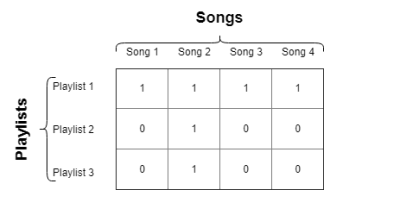

- pd.crosstab (from Pandas library) function is used to create a two-dimensional table that shows the frequency of occurrences of each track in each playlist.
- csr_matrix() function (SciPy library) is used to convert the binary matrix to a Compressed Sparse Row (CSR) matrix.

In [255]:
# Create Binary Sparse Matrix
s_matrix = pd.crosstab(pdwm_30k_filtered.pid, pdwm_30k_filtered.track_uri)
s_matrix = s_matrix.clip(upper=1)
assert np.max(s_matrix.describe().loc['max']) == 1

sparse_matrix = csr_matrix(s_matrix)

[codecarbon INFO @ 12:56:47] Energy consumed for RAM : 0.018709 kWh. RAM Power : 11.759872913360596 W
[codecarbon INFO @ 12:56:47] Energy consumed for all CPUs : 0.067638 kWh. All CPUs Power : 42.5 W
[codecarbon INFO @ 12:56:47] 0.086347 kWh of electricity used since the begining.
[codecarbon INFO @ 12:57:02] Energy consumed for RAM : 0.018758 kWh. RAM Power : 11.759872913360596 W
[codecarbon INFO @ 12:57:02] Energy consumed for all CPUs : 0.067815 kWh. All CPUs Power : 42.5 W
[codecarbon INFO @ 12:57:02] 0.086572 kWh of electricity used since the begining.
[codecarbon INFO @ 12:57:17] Energy consumed for RAM : 0.018807 kWh. RAM Power : 11.759872913360596 W
[codecarbon INFO @ 12:57:17] Energy consumed for all CPUs : 0.067992 kWh. All CPUs Power : 42.5 W
[codecarbon INFO @ 12:57:17] 0.086799 kWh of electricity used since the begining.
[codecarbon INFO @ 12:57:32] Energy consumed for RAM : 0.018856 kWh. RAM Power : 11.759872913360596 W
[codecarbon INFO @ 12:57:32] Energy consumed for all

In [256]:
# Convert the sparse matrix to a dense matrix
dense_matrix = sparse_matrix.toarray()

In [257]:
psparse_matrix = pd.DataFrame(dense_matrix, columns=s_matrix.columns.values)

# Save
psparse_matrix.to_csv('working/psparse_matrix.csv', index=False)

[codecarbon INFO @ 12:57:47] Energy consumed for RAM : 0.018905 kWh. RAM Power : 11.759872913360596 W
[codecarbon INFO @ 12:57:47] Energy consumed for all CPUs : 0.068346 kWh. All CPUs Power : 42.5 W
[codecarbon INFO @ 12:57:47] 0.087251 kWh of electricity used since the begining.
[codecarbon INFO @ 12:58:02] Energy consumed for RAM : 0.018954 kWh. RAM Power : 11.759872913360596 W
[codecarbon INFO @ 12:58:02] Energy consumed for all CPUs : 0.068523 kWh. All CPUs Power : 42.5 W
[codecarbon INFO @ 12:58:02] 0.087477 kWh of electricity used since the begining.
[codecarbon INFO @ 12:58:17] Energy consumed for RAM : 0.019003 kWh. RAM Power : 11.759872913360596 W
[codecarbon INFO @ 12:58:17] Energy consumed for all CPUs : 0.068700 kWh. All CPUs Power : 42.5 W
[codecarbon INFO @ 12:58:17] 0.087703 kWh of electricity used since the begining.
[codecarbon INFO @ 12:58:32] Energy consumed for RAM : 0.019051 kWh. RAM Power : 11.759872913360596 W
[codecarbon INFO @ 12:58:32] Energy consumed for all

The "obscure" concept in this code refers to removing a certain percentage of songs from each playlist in the dataset. The purpose of this is to simulate a scenario where the user has already listened to some of the songs in their playlist and wants to receive recommendations for new songs to listen to. By removing some songs from the playlist, the model can be tested on its ability to recommend songs that the user has not yet heard.

In this code, the number of obscured songs is set to 50% of the original playlist. However, this value can be adjusted depending on the specific use case or scenario being modeled. The key idea is to create a realistic scenario where some of the songs in the playlist have already been listened to and the model must recommend new songs that the user is likely to enjoy.

In [258]:
# Obscure each playlist in set by removing half the songs
indx_obs = []
n_obscured = []

df_obs = pd.DataFrame.copy(psparse_matrix)

# We need to add in the user's seed playlist to this dataset.
for i in tqdm(range(psparse_matrix.shape[0]), desc="Removing half of the song in the playlists"):
    obs_indices = np.random.choice(np.where(psparse_matrix[i] == 1)[0], size=len(np.where(psparse_matrix[i] == 1)[0])//2, replace=False)
    df_obs.iloc[i, obs_indices] = 0
    n_obscured.append(len(obs_indices))

Removing half of the song in the playlists:   0%|                                                                                    | 0/8606 [00:00<?, ?it/s]


KeyError: 0

In [259]:
def remove_songs(l, n):
    """
    Randomly removes a specified percentage of songs from a given list.

    Parameters:
        l (numpy.ndarray): A binary array representing the list of songs, where 1 indicates a song to keep and 0 indicates a song to remove.
        n (float): The percentage of songs to remove, specified as a decimal value between 0 and 1.

    Returns:
        numpy.ndarray: A new binary array representing the modified list of songs, where 1 indicates a kept song and 0 indicates a removed song.

    """
    hits = np.nonzero(l)[0]
    num_keep = int((1-n)*len(hits))
    idx_keep = np.random.choice(hits, num_keep, replace=False)
    new_array = np.zeros(len(l))
    new_array[idx_keep] = 1
    return new_array

obscured_arr = np.array(psparse_matrix)

# Obscure each playlist in set by removing half the songs
indx_obs = []
n_obscured = []

#We need to add in the user's seed playlist to this dataset.
for i, playlist in tqdm(enumerate(obscured_arr), total=obscured_arr.shape[0], desc="Removing half of the songs in the playlists"):
    obs_indices = remove_songs(playlist, 0.5)
    obscured_arr[i] = obs_indices
    n_obscured.append(int(sum(obs_indices)))

obscured_df = pd.DataFrame(obscured_arr, columns=psparse_matrix.columns, index=psparse_matrix.index)

Removing half of the songs in the playlists:  16%|███████████▎                                                           | 1367/8606 [00:04<00:23, 312.33it/s][codecarbon INFO @ 13:01:02] Energy consumed for RAM : 0.019541 kWh. RAM Power : 11.759872913360596 W
[codecarbon INFO @ 13:01:02] Energy consumed for all CPUs : 0.070647 kWh. All CPUs Power : 42.5 W
[codecarbon INFO @ 13:01:02] 0.090188 kWh of electricity used since the begining.
Removing half of the songs in the playlists:  69%|████████████████████████████████████████████████▉                      | 5929/8606 [00:19<00:08, 310.89it/s][codecarbon INFO @ 13:01:17] Energy consumed for RAM : 0.019590 kWh. RAM Power : 11.759872913360596 W
[codecarbon INFO @ 13:01:17] Energy consumed for all CPUs : 0.070824 kWh. All CPUs Power : 42.5 W
[codecarbon INFO @ 13:01:17] 0.090414 kWh of electricity used since the begining.
Removing half of the songs in the playlists: 100%|██████████████████████████████████████████████████████████████████████

In [260]:
def get_titles(song_bools, song_pl_df):
    """
    Retrieves the titles of songs based on a binary array and a song playlist DataFrame.

    Parameters:
        song_bools (numpy.ndarray): A binary array representing the selection of songs, where 1 indicates a selected song and 0 indicates a non-selected song.
        song_pl_df (pandas.DataFrame): A DataFrame representing the song playlist, where each column corresponds to a song.

    Returns:
        list: A list of song titles corresponding to the selected songs.

    """
    return [list(song_pl_df.columns)[i] for i, x in enumerate(song_bools) if x == 1]

def get_song_bool_list(songs, song_pl_df):
    """
    Creates a binary array indicating the selection of songs based on a list of song titles and a song playlist DataFrame.

    Parameters:
        songs (list): A list of song titles.
        song_pl_df (pandas.DataFrame): A DataFrame representing the song playlist, where each column corresponds to a song.

    Returns:
        numpy.ndarray: A binary array indicating the selection of songs, where 1 indicates a selected song and 0 indicates a non-selected song.
    
    """
    seed_play = np.zeros(len(list(song_pl_df.columns)))
    song_idx = [list(song_pl_df.columns).index(s) for s in songs]
    seed_play[song_idx] = 1
    return seed_play

In [261]:
def baseline(tracks, df, n_pred):
    """
    Generates a baseline recommendation by finding similar tracks based on track popularity.

    Parameters:
        tracks (list): A list of track URIs representing the seed tracks.
        df (pandas.DataFrame): A DataFrame containing track information, including 'track_uri' and 'track_popularity' columns.
        n_pred (int): The number of predictions to generate.

    Returns:
        list: A list of predicted track URIs representing the baseline recommendations.

    """
    recs = []
    for t in tracks:
        t_popularity = df[df['track_uri'] == t]['track_popularity']
        df['rec_df_popular'] = np.abs(df['track_popularity'] - t_popularity.values[0])
        one_recs = list(df.sort_values(by=['rec_df_popular'])['track_uri'][1:].values)
        recs += [track for track in one_recs if track not in tracks][:n_pred]
    preds = Counter(recs).most_common(n_pred)
    pred_titles = [p[0] for p in preds]
    return pred_titles

#### Predictions

In [262]:
pred_songs_bool = []

for index, n in tqdm(enumerate(n_obscured), total=len(n_obscured), desc="Processing data"):
    pred_songs = baseline(get_titles(obscured_df.iloc[index], psparse_matrix), pdwm_30k_filtered, n)
    pred_songs_bool.append(get_song_bool_list(pred_songs, psparse_matrix))

Processing data:   0%|                                                                                                               | 0/8606 [00:00<?, ?it/s]/tmp/ipykernel_15313/4259123265.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rec_df_popular'] = np.abs(df['track_popularity'] - t_popularity.values[0])
Processing data:   1%|█▏                                                                                                    | 97/8606 [00:05<09:05, 15.59it/s][codecarbon INFO @ 13:01:32] Energy consumed for RAM : 0.019639 kWh. RAM Power : 11.759872913360596 W
[codecarbon INFO @ 13:01:32] Energy consumed for all CPUs : 0.071001 kWh. All CPUs Power : 42.5 W
[codecarbon INFO @ 13:01:32] 0.090640 kWh of electricity used since the begin

### Metrics

In [263]:
def dcg_at_k(r, k, method=0):
    """
    Computes the Discounted Cumulative Gain (DCG) at a specified rank `k` given a list of relevance scores.

    Parameters:
        r (list or numpy.ndarray): A list or 1-D numpy array containing the relevance scores.
        k (int): The rank at which to compute the DCG.
        method (int, optional): The formula to use for computing the DCG. 0 for the default formula, 1 for the alternative formula. Default is 0.

    Returns:
        float: The DCG at rank `k`.

    Raises:
        ValueError: If `method` is not 0 or 1.

    """
    r = np.asfarray(r)[:k]
    if r.size:
        if method == 0:
            return r[0] + np.sum(r[1:] / np.log2(np.arange(2, r.size + 1)))
        elif method == 1:
            return np.sum(r / np.log2(np.arange(2, r.size + 2)))
        else:
            raise ValueError('method must be 0 or 1.')
    return 0.

def ndcg_at_k(r, k, method=0):
    """
    Computes the Normalized Discounted Cumulative Gain (NDCG) at a specified rank `k` given a list of relevance scores.

    Parameters:
        r (list or numpy.ndarray): A list or 1-D numpy array containing the relevance scores.
        k (int): The rank at which to compute the NDCG.
        method (int, optional): The formula to use for computing the NDCG. 0 for the default formula, 1 for the alternative formula. Default is 0.

    Returns:
        float: The NDCG at rank `k`.

    """
    dcg_max = dcg_at_k(sorted(r, reverse=True), k, method)
    if not dcg_max:
        return 0.
    return dcg_at_k(r, k, method) / dcg_max

In [264]:
# Score the model's performance
r2 = []
ndcgs = []
for i, pred in tqdm(enumerate(pred_songs_bool), total=len(pred_songs_bool), desc="Scoring model's performance"):
    pred_idx = [idx for idx, p in enumerate(pred) if p == 1]
    right = np.array(psparse_matrix.iloc[i]) - np.array(obscured_df.iloc[i])
    right_idx = [idx for idx, r in enumerate(right) if r == 1]
    try:
        r2.append(sum([1 for pidx in pred_idx if pidx in right_idx])/len(pred_idx))
    except ZeroDivisionError:
        r2.append(0)
    r = [1 if idx in pred_idx else 0 for idx in right_idx]
    ndcgs.append(ndcg_at_k(r, len(r)))
print(np.mean(r2))
print(np.mean(ndcgs))

Scoring model's performance:   9%|███████▉                                                                                 | 768/8606 [00:10<01:43, 76.04it/s][codecarbon INFO @ 13:09:32] Energy consumed for RAM : 0.021206 kWh. RAM Power : 11.759872913360596 W
[codecarbon INFO @ 13:09:32] Energy consumed for all CPUs : 0.076669 kWh. All CPUs Power : 42.5 W
[codecarbon INFO @ 13:09:32] 0.097876 kWh of electricity used since the begining.
Scoring model's performance:  22%|███████████████████▍                                                                    | 1896/8606 [00:25<01:29, 75.29it/s][codecarbon INFO @ 13:09:47] Energy consumed for RAM : 0.021255 kWh. RAM Power : 11.759872913360596 W
[codecarbon INFO @ 13:09:47] Energy consumed for all CPUs : 0.076847 kWh. All CPUs Power : 42.5 W
[codecarbon INFO @ 13:09:47] 0.098102 kWh of electricity used since the begining.
Scoring model's performance:  35%|███████████████████████████████                                                       

0.0001839801688744287
0.00046479200557750407


In [265]:
print("R2 score for baseline: {}".format(np.mean(r2)))
print("NDCGS score for baseline: {}".format(np.mean(ndcgs)))

R2 score for baseline: 0.0001839801688744287
NDCGS score for baseline: 0.00046479200557750407


[codecarbon INFO @ 13:11:17] Energy consumed for RAM : 0.021549 kWh. RAM Power : 11.759872913360596 W
[codecarbon INFO @ 13:11:17] Energy consumed for all CPUs : 0.077908 kWh. All CPUs Power : 42.5 W
[codecarbon INFO @ 13:11:17] 0.099457 kWh of electricity used since the begining.
[codecarbon INFO @ 13:11:32] Energy consumed for RAM : 0.021598 kWh. RAM Power : 11.759872913360596 W
[codecarbon INFO @ 13:11:32] Energy consumed for all CPUs : 0.078085 kWh. All CPUs Power : 42.5 W
[codecarbon INFO @ 13:11:32] 0.099683 kWh of electricity used since the begining.
[codecarbon INFO @ 13:11:47] Energy consumed for RAM : 0.021647 kWh. RAM Power : 11.759872913360596 W
[codecarbon INFO @ 13:11:47] Energy consumed for all CPUs : 0.078262 kWh. All CPUs Power : 42.5 W
[codecarbon INFO @ 13:11:47] 0.099909 kWh of electricity used since the begining.
[codecarbon INFO @ 13:12:02] Energy consumed for RAM : 0.021696 kWh. RAM Power : 11.759872913360596 W
[codecarbon INFO @ 13:12:02] Energy consumed for all

In [266]:
experiment.end()

[codecarbon INFO @ 13:12:41] Energy consumed for RAM : 0.021822 kWh. RAM Power : 11.759872913360596 W
[codecarbon INFO @ 13:12:41] Energy consumed for all CPUs : 0.078895 kWh. All CPUs Power : 42.5 W
[codecarbon INFO @ 13:12:41] 0.100717 kWh of electricity used since the begining.
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/sadcor/general/c9719edc2a184ee999e7aef5639b3542
COMET INFO:   Uploads:
COMET INFO:     asset               : 1 (685 bytes)
COMET INFO:     environment details : 1
COMET INFO:     filename            : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 1
COMET INFO:     os packages         : 1
COMET INFO:     source_code    